In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing and cleaning motion sensor data

First, we'll import our csv files from the '$\verb|./data/raw_data|$' directory as a pandas dataframe. Each contains a trial of two columns, where column 0 is time and column 1 is position. These dataframes are the collected in a 2D list. 

In [136]:
sym1 = pd.read_csv('data/raw_data/sym1.csv', sep=',', header=0)
sym2 = pd.read_csv('data/raw_data/sym2.csv', sep=',', header=0)
sym3 = pd.read_csv('data/raw_data/sym3.csv', sep=',', header=0)

antisym1 = pd.read_csv('data/raw_data/antisym1.csv', sep=',', header=0)
antisym2 = pd.read_csv('data/raw_data/antisym2.csv', sep=',', header=0)
antisym3 = pd.read_csv('data/raw_data/antisym3.csv', sep=',', header=0)

mixed1 = pd.read_csv('data/raw_data/mixed1.csv', sep=',', header=0)
mixed2 = pd.read_csv('data/raw_data/mixed2.csv', sep=',', header=0)
mixed3 = pd.read_csv('data/raw_data/mixed3.csv', sep=',', header=0)

$\verb|data|$ below contains all nine of our datasets, grouped by mode. It is a list of three lists, which contain the three trials of each of symmetric, antisymmetric, and mixed. That is, $\verb|data[0]|$ is the list of symmetric modes, $\verb|data[1]|$ contains the antisymmetric, and 
$\verb|data[2]|$ the mixed modes. From there, $\verb|data[j][i]|$ gives the $i^\text{th}$ trial ($i = (1,2,3)$) of that mode.

In [137]:
data = [[sym1, sym2, sym3], [antisym1, antisym2, antisym3], [mixed1, mixed2, mixed3]]

Before performing our FFT, we need to clean up the data. There is a flat region before we release the carts from equilibrium, but after pressing "collect data" (or whatever the button is called). We need to remove this region, which we do by finding the index in the dataframe when the position
first changes, and getting rid of all the indices before that.

We also need our data to be displacements rather than positions. Right now each position includes the distance from the sensor to the cart, but we really want the displacement from equilibrium. To make that happen, we need to subtract off the mean from each position, which makes the average zero.

After doing so, we'll save the result of this process for each dataset as a CSV in the '$\verb|./data/cleaned_data|$' directory.

In [138]:
def clean_data(dataframe):
    first_value = dataframe['position'][0]  # First position, columns in dataframes are reference by heading rather than index
    current_index = 0

    while(dataframe['position'][current_index] == first_value):
        current_index += 1

    # Remove everything before the index where position changes
    clean_dataframe = dataframe.drop(range(0,current_index-1))
    clean_dataframe = clean_dataframe.reset_index(drop=True)  # Dropping those values doesn't reset indices, so the first entry needs to be manually reset back to index 0
    
    # Shift positions so the average is zero
    average_position = np.mean(clean_dataframe['position'])
    clean_dataframe['position'] = clean_dataframe['position'] - average_position
    
    return clean_dataframe

In [139]:
# Initialize 2D list with necessary geometry
cleaned_data = [[0,0,0],[0,0,0],[0,0,0]]

# Clean all the data
for j in range(3):
    for i in range(3):
        cleaned_data[j][i] = clean_data(data[j][i])

In [140]:
# Export all cleaned dataframes to CSV format
for i in range(3):
    cleaned_data[0][i].to_csv(f"./data/cleaned_data/sym{i+1}_cleaned.csv", index=False)
    cleaned_data[1][i].to_csv(f"./data/cleaned_data/antisym{i+1}_cleaned.csv", index=False)
    cleaned_data[2][i].to_csv(f"./data/cleaned_data/mixed{i+1}_cleaned.csv", index=False)

## Time-series plotting

The goal now is to plot all of our cleaned data. We will make one image combining all 9 plots to display in the notebook, as well as save all the individual plots (and the big one) to png in the '$\verb|./figures|$' directory

In [141]:
plot_color = ['blue', 'green', 'red']

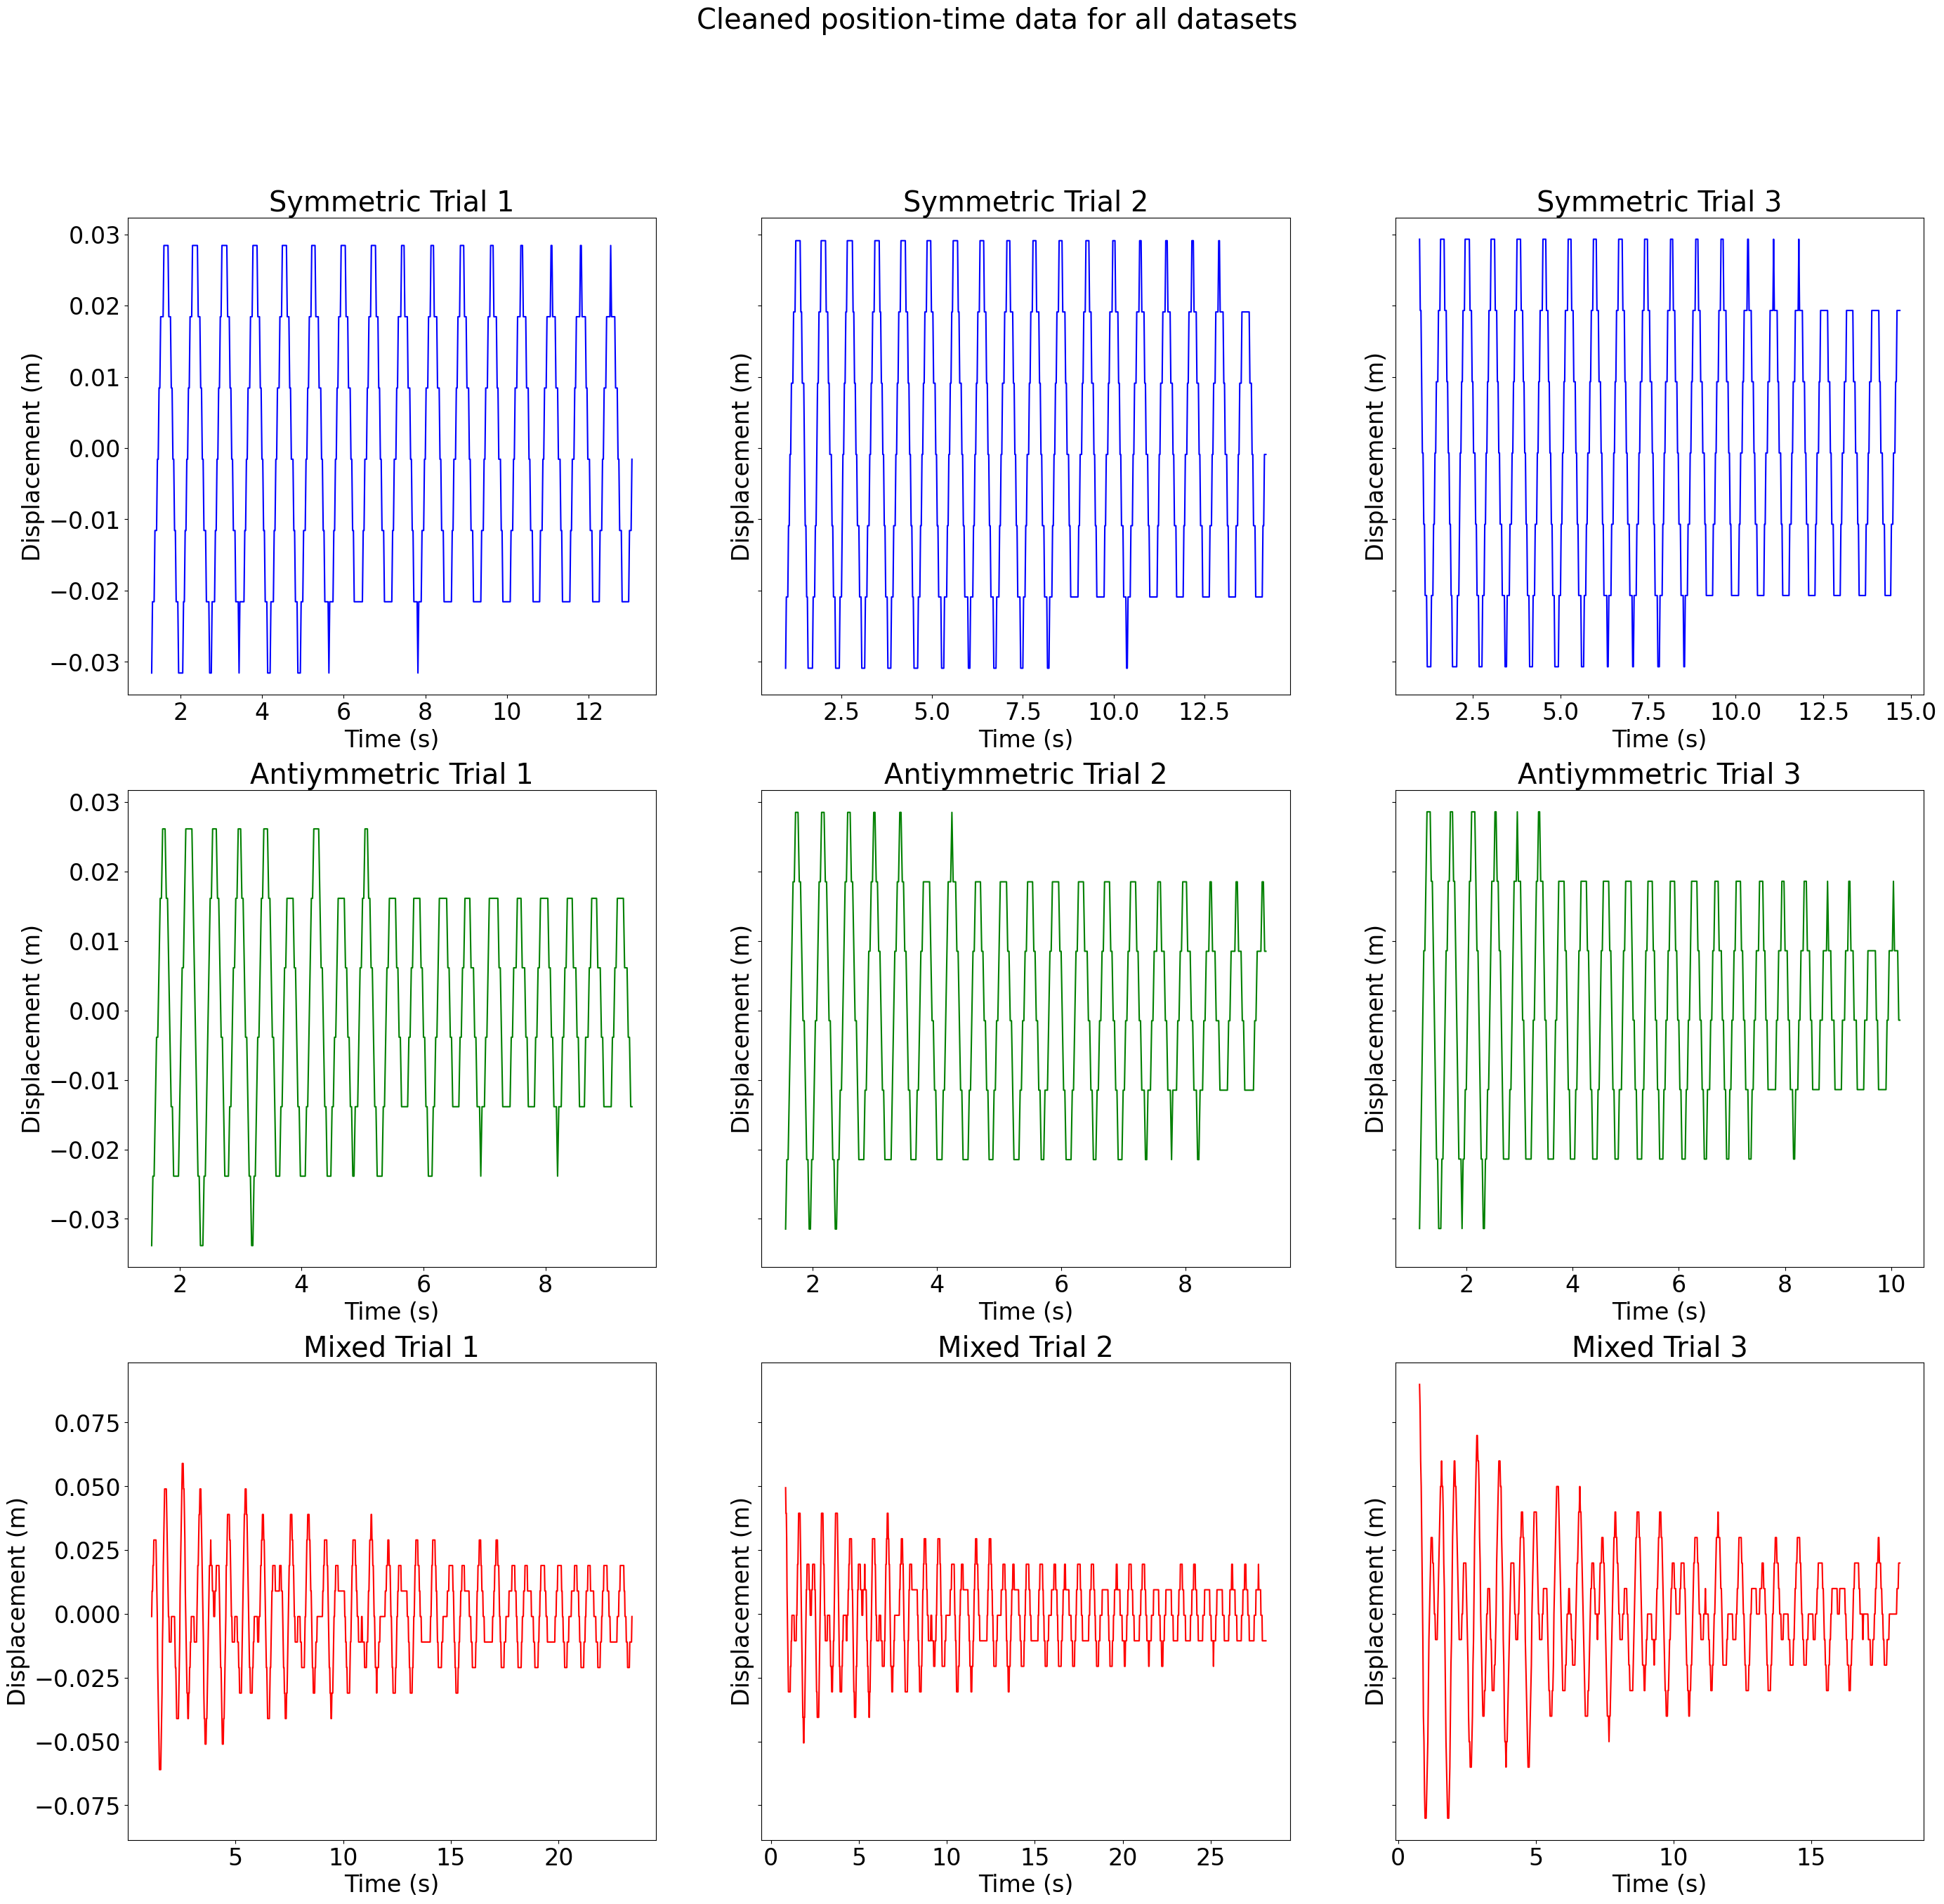

In [142]:
# Make a 3 x 3 subplot environment
fig, axs = plt.subplots(3, 3, sharey='row') 
plt.rcParams['figure.figsize'] = [33, 30]  # Controls the size of the figure in notebook, making it larger than default
plt.rcParams['font.size'] = 24 # Make the font size legible with a figure this large
fig.suptitle('Cleaned position-time data for all datasets')

# Set all plot parameters.
for j in range(3):
    for i in range(3):
        # General parameters for all plots
        axs[j][i].plot(cleaned_data[j][i]['time'], cleaned_data[j][i]['position'], color = plot_color[j])
        axs[j][i].set_xlabel('Time (s)')
        axs[j][i].set_ylabel('Displacement (m)')

        # Specific parameters for certain plots
        if (j == 0):
            axs[j][i].set_title(f'Symmetric Trial {i+1}')
        elif (j == 1):
            axs[j][i].set_title(f'Antiymmetric Trial {i+1}')
        elif (j == 2):
            axs[j][i].set_title(f'Mixed Trial {i+1}')
        

In [143]:
# Directory to save figures to
directory = './figures/time_domain/'

# Save the main figure with all nine plots
fig._suptitle.set_visible(True)   # Just in case this cell gets run multiple times in a row, ensures supertitle will always show
fig.savefig(directory+'all_time_domain_plot.png')

# Save each subplot with its axes, labels, and title
for j in range(3):
    for i in range(3):
        ax = axs[j, i]
        
        # Hide the big picture's title
        fig._suptitle.set_visible(False)
        
        # Hide other subplots temporarily
        for ax_other in axs.flat:
            ax_other.set_visible(False)
            
        ax.set_visible(True)
        
        # Save the current subplot
        if (j == 0):
            filename = f"symmetric{i+1}_time_domain_plot.png"
        elif (j == 1):
            filename = f"antisymmetric{i+1}_time_domain_plot.png"
        elif (j == 2):
            filename = f"mixed{i+1}_time_domain_plot.png"
        
        fig.savefig(directory+filename, bbox_inches="tight", dpi=300)
        print(f"Saved {filename}")

        # Restore visibility for all axes
        for ax_other in axs.flat:
            ax_other.set_visible(True)

Saved symmetric1_time_domain_plot.png
Saved symmetric2_time_domain_plot.png
Saved symmetric3_time_domain_plot.png
Saved antisymmetric1_time_domain_plot.png
Saved antisymmetric2_time_domain_plot.png
Saved antisymmetric3_time_domain_plot.png
Saved mixed1_time_domain_plot.png
Saved mixed2_time_domain_plot.png
Saved mixed3_time_domain_plot.png


## FFT into the frequency domain

We now perform the Fast Fourier transform on our data. This is done with np.fft.rfft(), the "real fast fourier transform." A typical Fourier transform is defined on the complex numbers, but since our input is only real numbers (time and position values), the full Fourier transform would be symmetric. Using rfft allows us to only do half of the computations.

In [144]:
def fft_series(clean_dataframe):
    dt = clean_dataframe['time'][1] - clean_dataframe['time'][0]
    
    frame_fft = np.fft.rfft(clean_dataframe['position'])
    frame_freq = np.fft.rfftfreq(len(clean_dataframe['time']), d=dt)
    frame_amplitude = np.abs(frame_fft)

    # Construct and return a dataframe where column 0 is frequencies and column 1 is amplitudes
    fft_dataframe = pd.DataFrame({'frequency': frame_freq, 'amplitude': np.abs(frame_fft)})
    return fft_dataframe

In [145]:
# Initialize 2D list with necessary geometry
fft_data = [[0,0,0],[0,0,0],[0,0,0]]

# Perform FFT on each dataset
for j in range(3):
    for i in range(3):
        fft_data[j][i] = fft_series(cleaned_data[j][i])

In [146]:
# Export all FFT dataframes to CSV format
for i in range(3):
    fft_data[0][i].to_csv(f"./data/fft_data/sym{i+1}_fft.csv", index=False)
    fft_data[1][i].to_csv(f"./data/fft_data/antisym{i+1}_fft.csv", index=False)
    fft_data[2][i].to_csv(f"./data/fft_data/mixed{i+1}_fft.csv", index=False)

## Analysis and plotting of frequency data

After making the plots below---initially without the peaks labelled---we decided it would be insightful to....have the peaks labeled. That is, to know the value of the frequency that has the greatest frequency in the FFT. To make this happen, we need those code cells to execute above the plot (since there's no reason to do the plotting code twice), so first in this section we will find those peaks.

In [147]:
from scipy.signal import find_peaks
# find_peaks method locates local maxima on the dataset, returning the index at which they occur.
# We initialize a 2D list (3D? hard to keep track) to store these, expecting 1 peak for each antisymmetric and symmetric, and 2 for each mixed
peak_index = [[0,0,0],[0,0,0],[[0,0],[0,0],[0,0]]]
peak_frequencies = [[0,0,0],[0,0,0],[[0,0],[0,0],[0,0]]]
peak_amplitudes = [[0,0,0],[0,0,0],[[0,0],[0,0],[0,0]]]

for j in range(3):
    for i in range(3):
        if (j == 0 or j == 1):
            # Stores INDEX of frequency that gives maximum amplitude. height = 2 since we know the peaks are all above 2, and setting
            # this threshold allows us to avoid the "noise" peaks at the bottom of each plot.

            # First [0] to access the index array part of the output, second to access the actual index
            peak_index[j][i] = find_peaks(fft_data[j][i]['amplitude'], height = 2)[0][0] 
            
            # Store the frequency and amplitude associated with the found peak index
            peak_frequencies[j][i] = fft_data[j][i]['frequency'][peak_index[j][i]]
            peak_amplitudes[j][i] = fft_data[j][i]['amplitude'][peak_index[j][i]]
        else:
            # Indices of the two peaks assigned to peak_index
            peak_index[j][i][0] = find_peaks(fft_data[j][i]['amplitude'], height = 2)[0][0] # Index of first peak
            peak_index[j][i][1] = find_peaks(fft_data[j][i]['amplitude'], height = 2)[0][1] # Index of second peak

            # Store the frequencies and amplitudes
            peak_frequencies[j][i][0] = fft_data[j][i]['frequency'][peak_index[j][i][0]]
            peak_frequencies[j][i][1] = fft_data[j][i]['frequency'][peak_index[j][i][1]]
            peak_amplitudes[j][i][0] = fft_data[j][i]['amplitude'][peak_index[j][i][0]]
            peak_amplitudes[j][i][1] = fft_data[j][i]['amplitude'][peak_index[j][i][1]]

Here, we'll reuse the code from the time-domain with all the necessary details changed to frequency-domain.

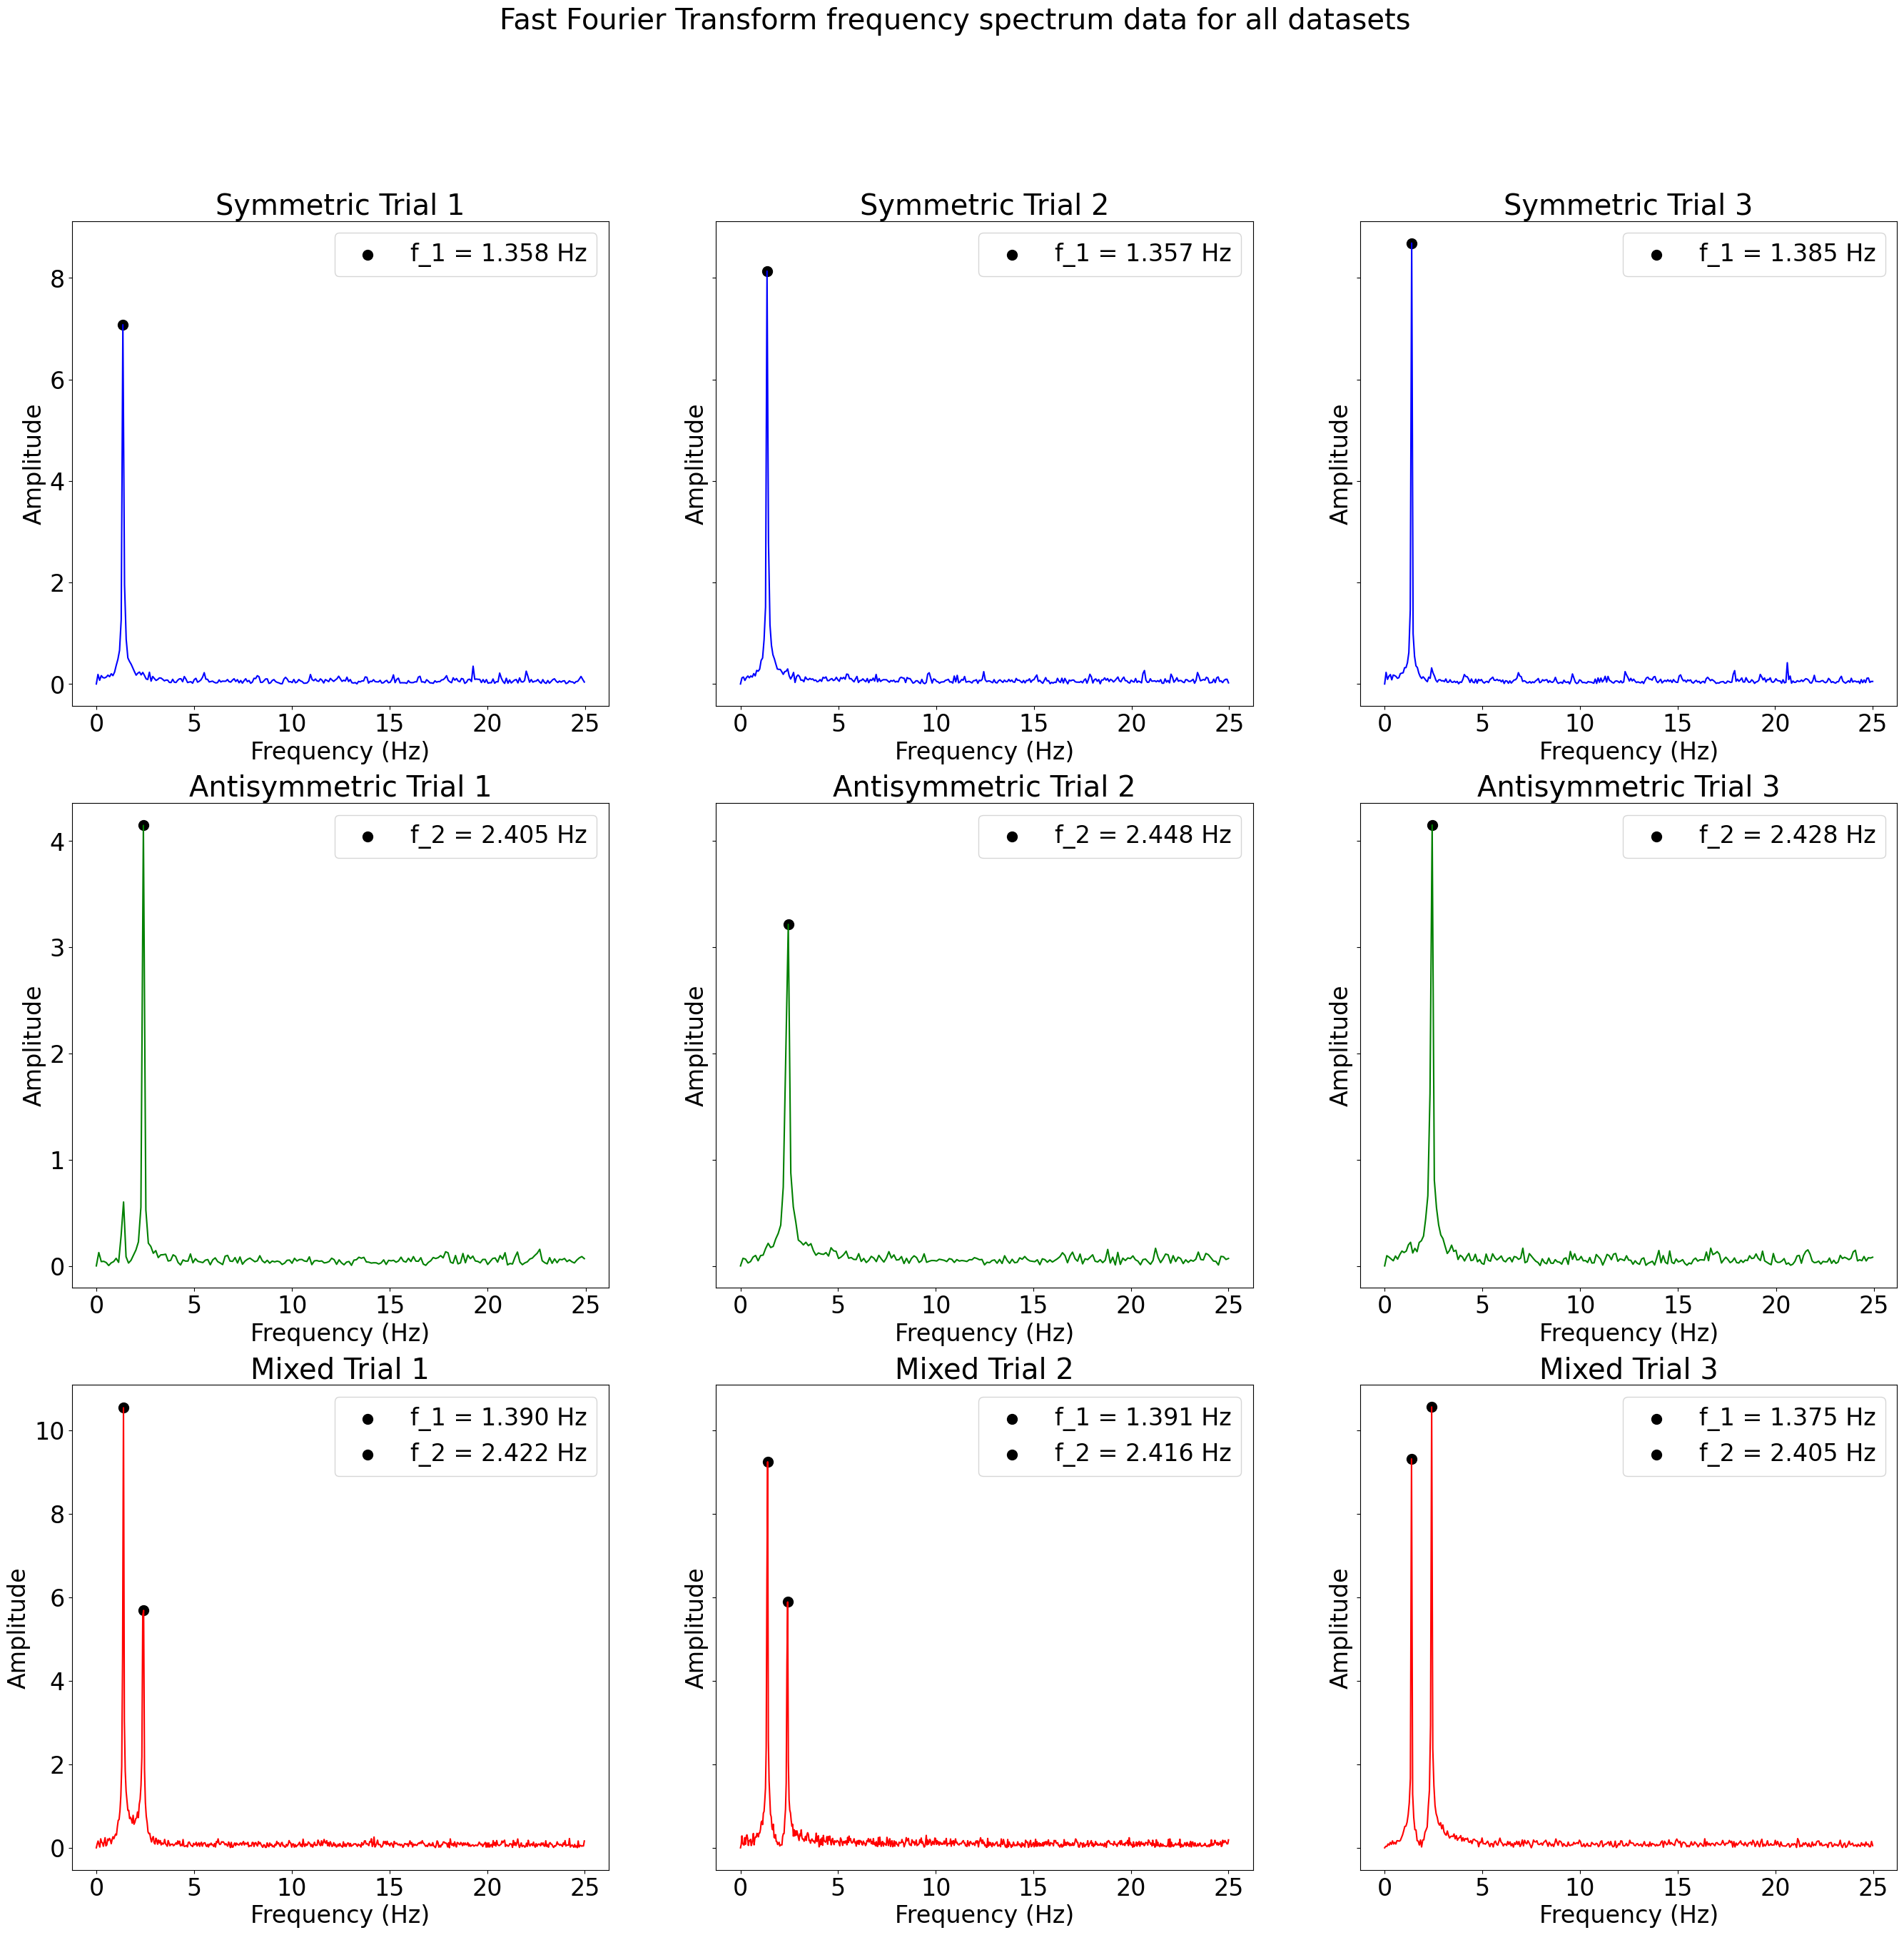

In [149]:
# Make a 3 x 3 subplot environment
fig, axs = plt.subplots(3, 3, sharey='row') 
plt.rcParams['figure.figsize'] = [33, 30]  # Controls the size of the figure in notebook, making it larger than default
plt.rcParams['font.size'] = 24 # Make the font size legible with a figure this large
fig.suptitle('Fast Fourier Transform frequency spectrum data for all datasets')

# Set all plot parameters.
for j in range(3):
    for i in range(3):
        # General parameters for all plots
        axs[j][i].plot(fft_data[j][i]['frequency'], fft_data[j][i]['amplitude'], color = plot_color[j])
        axs[j][i].set_xlabel('Frequency (Hz)')
        axs[j][i].set_ylabel('Amplitude')

        # Specific parameters for certain plots
        if (j == 0):
            axs[j][i].set_title(f'Symmetric Trial {i+1}')
            axs[j][i].scatter(peak_frequencies[j][i], peak_amplitudes[j][i], label=f'f_1 = {peak_frequencies[j][i]:0.3f} Hz',s=100, color='black')
            axs[j][i].legend()
        elif (j == 1):
            axs[j][i].set_title(f'Antisymmetric Trial {i+1}')
            axs[j][i].scatter(peak_frequencies[j][i], peak_amplitudes[j][i], label=f'f_2 = {peak_frequencies[j][i]:0.3f} Hz',s=100, color='black')
            axs[j][i].legend()
        elif (j == 2):
            axs[j][i].set_title(f'Mixed Trial {i+1}')
            axs[j][i].scatter(peak_frequencies[j][i][0], peak_amplitudes[j][i][0], label=f'f_1 = {peak_frequencies[j][i][0]:0.3f} Hz',s=100, color='black')
            axs[j][i].scatter(peak_frequencies[j][i][1], peak_amplitudes[j][i][1], label=f'f_2 = {peak_frequencies[j][i][1]:0.3f} Hz',s=100, color='black')
            axs[j][i].legend()
        

In [150]:
# Directory to save figures to
directory = './figures/freq_domain/'

# Save the main figure with all nine plots
fig._suptitle.set_visible(True)   # Just in case this cell gets run multiple times in a row, ensures supertitle will always show
fig.savefig(directory+'all_freq_domain_plot.png')

# Save each subplot with its axes, labels, and title
for j in range(3):
    for i in range(3):
        ax = axs[j, i]
        
        # Hide the big picture's title
        fig._suptitle.set_visible(False)
        
        # Hide other subplots temporarily
        for ax_other in axs.flat:
            ax_other.set_visible(False)
            
        ax.set_visible(True)
        
        # Save the current subplot
        if (j == 0):
            filename = f"symmetric{i+1}_freq_domain_plot.png"
        elif (j == 1):
            filename = f"antisymmetric{i+1}_freq_domain_plot.png"
        elif (j == 2):
            filename = f"mixed{i+1}_freq_domain_plot.png"
        
        fig.savefig(directory+filename, bbox_inches="tight", dpi=300)
        print(f"Saved {filename}")

        # Restore visibility for all axes
        for ax_other in axs.flat:
            ax_other.set_visible(True)

Saved symmetric1_freq_domain_plot.png
Saved symmetric2_freq_domain_plot.png
Saved symmetric3_freq_domain_plot.png
Saved antisymmetric1_freq_domain_plot.png
Saved antisymmetric2_freq_domain_plot.png
Saved antisymmetric3_freq_domain_plot.png
Saved mixed1_freq_domain_plot.png
Saved mixed2_freq_domain_plot.png
Saved mixed3_freq_domain_plot.png


As a final bit of analysis, we can calculate averages for the frequencies found via FFT across all SIX trials of each, three from a normal mode and 3 from the mixed mode (which shows us both peaks). We first find the averages of those 3 per, and then average the results from the normal mode and those from the mixed mode. Finally, we convert this back to an angular frequency by multiplying by $2\pi$.

In [151]:
average_f1_normal = np.array(peak_frequencies[0]).mean()
average_f2_normal = np.array(peak_frequencies[1]).mean()
average_f1_mixed = np.array(peak_frequencies[2])[:,0].mean()
average_f2_mixed = np.array(peak_frequencies[2])[:,1].mean()

average_f1 = (average_f1_normal + average_f1_mixed)/2
average_f2 = (average_f2_normal + average_f2_mixed)/2

In [152]:
print(f'Average frequency 1 (symmetric mode): {average_f1:0.2f}')
print(f'Average frequency 2 (antisymmetric mode): {average_f2:0.2f}')

Average frequency 1 (symmetric mode): 1.38
Average frequency 2 (antisymmetric mode): 2.42


In [153]:
print(f'Average angular frequency 1 (symmetric mode): {average_f1*np.pi*2:0.2f}')
print(f'Average frequency 2 (antisymmetric mode): {average_f2*np.pi*2:0.2f}')

Average angular frequency 1 (symmetric mode): 8.65
Average frequency 2 (antisymmetric mode): 15.21
